In [93]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [94]:
df = pd.read_csv("bigmart_sales.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [95]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [96]:
len(df["Item_Identifier"].unique())

1559

In [97]:
len(df["Outlet_Identifier"].unique())

10

In [98]:
df.shape

(8523, 12)

In [99]:
# Checking for null values

df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

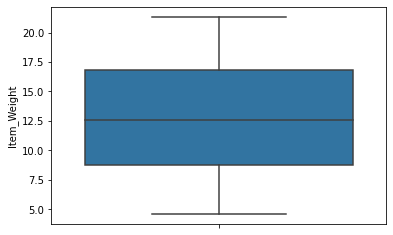

In [100]:
# Replacing null values

import seaborn as sns
sns.boxplot(df['Item_Weight'],orient='v')

In [101]:
# no outliers hence we can replace the missing values with mean

df["Item_Weight"] = df["Item_Weight"].replace(np.nan,df["Item_Weight"].mean())

In [102]:
df["Outlet_Size"].mode()

0    Medium
dtype: object

In [103]:
# replacing with mode

df["Outlet_Size"] = df["Outlet_Size"].replace(np.nan,"Medium")

In [104]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [105]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [106]:
# using label encoder to convert Categorical to numerical data

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 

df[["Item_Identifier","Item_Fat_Content","Item_Type","Outlet_Identifier","Outlet_Size","Outlet_Location_Type","Outlet_Type"]] = df[["Item_Identifier","Item_Fat_Content","Item_Type","Outlet_Identifier","Outlet_Size","Outlet_Location_Type","Outlet_Type"]].apply(label_encoder.fit_transform)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [107]:
# Correlation

df.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.044518,-0.098114,-0.025482,-0.017973,0.012853,-0.008602,-0.012772,0.001389,0.003656,-0.001178,0.002869
Item_Weight,0.044518,1.000000,-0.017331,-0.012049,0.028015,0.024756,-0.007975,-0.008301,-0.007225,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.098114,-0.017331,1.000000,0.034042,-0.115958,-0.000876,-0.002357,-0.000189,-0.012058,-0.004102,-0.004214,0.009800
Item_Visibility,-0.025482,-0.012049,0.034042,1.000000,-0.035249,-0.001315,-0.100439,-0.074834,0.069309,-0.028099,-0.173468,-0.128625
Item_Type,-0.017973,0.028015,-0.115958,-0.035249,1.000000,0.032651,0.001656,0.004970,-0.001859,0.003084,0.003053,0.017048
Item_MRP,0.012853,0.024756,-0.000876,-0.001315,0.032651,1.000000,0.003319,0.005020,0.006059,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.008602,-0.007975,-0.002357,-0.100439,0.001656,0.003319,1.000000,0.079035,0.504603,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,-0.012772,-0.008301,-0.000189,-0.074834,0.004970,0.005020,0.079035,1.000000,0.193389,-0.089216,-0.122304,-0.049135
Outlet_Size,0.001389,-0.007225,-0.012058,0.069309,-0.001859,0.006059,0.504603,0.193389,1.000000,-0.614311,-0.201483,-0.086182
Outlet_Location_Type,0.003656,0.004088,-0.004102,-0.028099,0.003084,0.000232,-0.716176,-0.089216,-0.614311,1.000000,0.467219,0.089367


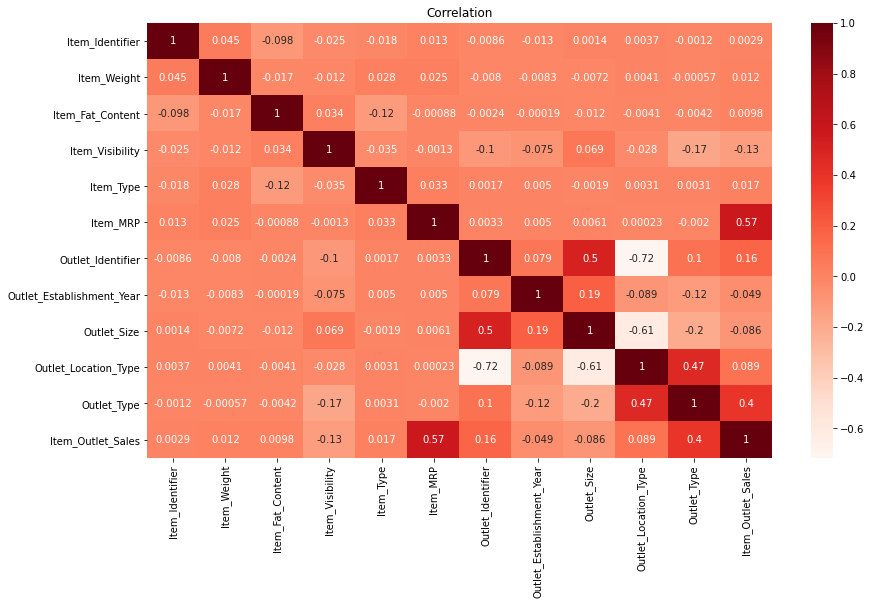

In [108]:
# Visualizing correlation

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14,8))
plt.title("Correlation")
sns.heatmap(df.corr(),annot=True,cmap='Reds')

In [109]:
# Dropping -vely correlated columns to the target

df.drop("Outlet_Size",axis=1,inplace=True)
df.drop("Outlet_Establishment_Year",axis=1,inplace=True)
df.drop("Item_Visibility",axis=1,inplace=True)
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,4,249.8092,9,0,1,3735.1380
1,8,5.92,2,14,48.2692,3,2,2,443.4228
2,662,17.50,1,10,141.6180,9,0,1,2097.2700
3,1121,19.20,2,6,182.0950,0,2,0,732.3800
4,1297,8.93,1,9,53.8614,1,2,1,994.7052


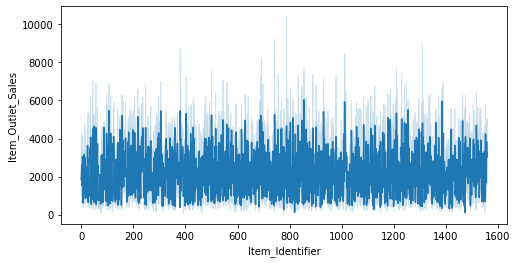

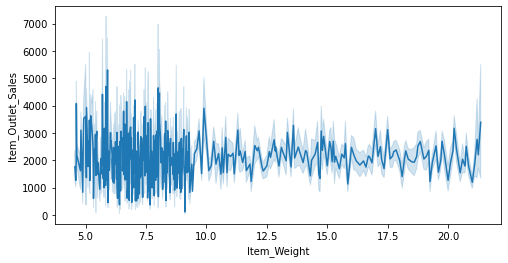

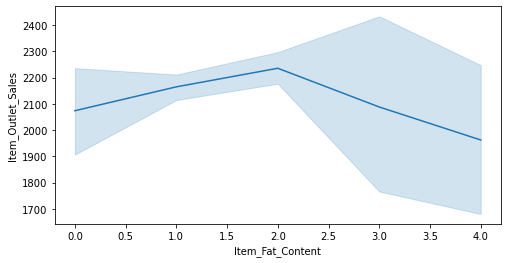

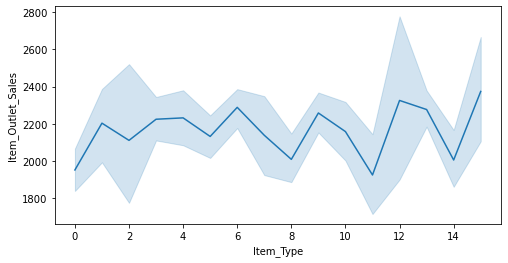

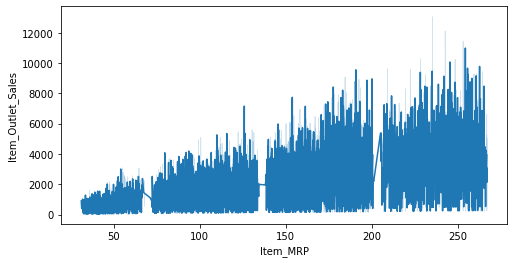

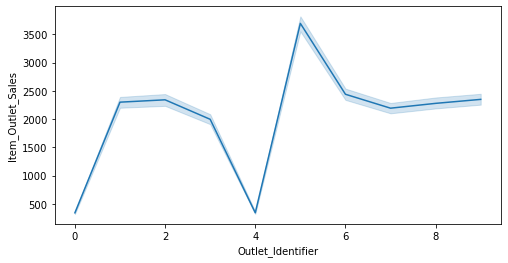

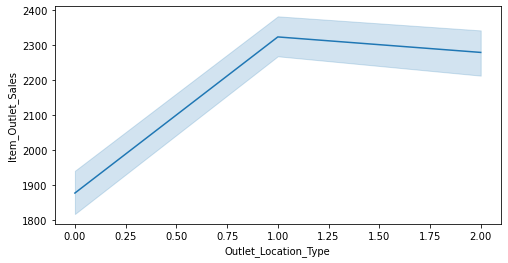

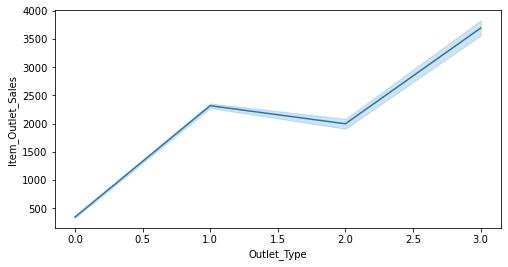

In [110]:
# Looking at lineplots

x = df.drop("Item_Outlet_Sales",axis=1)

collist = x.columns.values

for i in range(len(collist)):
    plt.figure(figsize=(8,4))
    sns.lineplot(x=df[collist[i]],y = df["Item_Outlet_Sales"])
    plt.show()
    


In [111]:
# dropping item_identifier

df.drop("Item_Identifier",axis=1,inplace=True)
df.head()

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,1,4,249.8092,9,0,1,3735.1380
1,5.92,2,14,48.2692,3,2,2,443.4228
2,17.50,1,10,141.6180,9,0,1,2097.2700
3,19.20,2,6,182.0950,0,2,0,732.3800
4,8.93,1,9,53.8614,1,2,1,994.7052


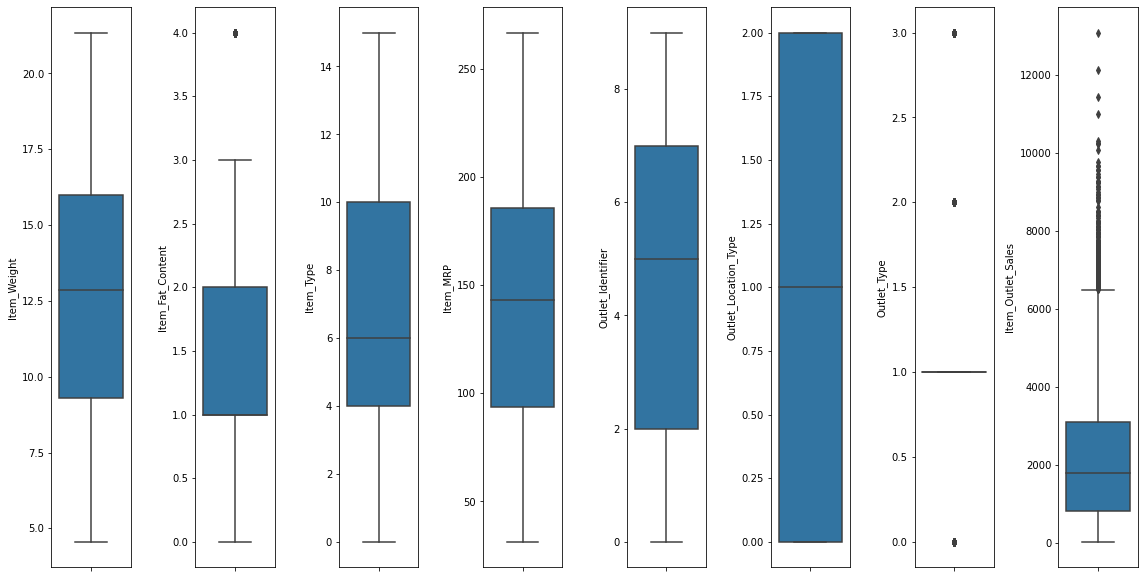

In [112]:
# Checking for outliers using boxplot

collist = df.columns.values
ncol = 8
nrows = 5

plt.figure(figsize=(16,5*ncol))
for i in range(len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],orient = "v")
    plt.tight_layout()

In [113]:
# Removing outliers

from scipy.stats import zscore
z=np.abs(zscore(df))
df_new=df[(z<3).all(axis=1)]
df_new.head()

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,1,4,249.8092,9,0,1,3735.1380
1,5.92,2,14,48.2692,3,2,2,443.4228
2,17.50,1,10,141.6180,9,0,1,2097.2700
3,19.20,2,6,182.0950,0,2,0,732.3800
4,8.93,1,9,53.8614,1,2,1,994.7052


In [114]:
df.shape

(8523, 8)

In [115]:
df_new.shape

(8317, 8)

In [116]:
df = df_new

In [117]:
# Skewness

df.skew()

Item_Weight             0.088509
Item_Fat_Content        0.283015
Item_Type               0.095381
Item_MRP                0.137207
Outlet_Identifier      -0.059837
Outlet_Location_Type   -0.198586
Outlet_Type             0.936402
Item_Outlet_Sales       0.884446
dtype: float64

In [118]:
df[['Outlet_Type']] = np.log1p(df[['Outlet_Type']])
df[['Item_Outlet_Sales']] = np.sqrt(df[["Item_Outlet_Sales"]])

In [119]:
df.skew()

Item_Weight             0.088509
Item_Fat_Content        0.283015
Item_Type               0.095381
Item_MRP                0.137207
Outlet_Identifier      -0.059837
Outlet_Location_Type   -0.198586
Outlet_Type            -0.247075
Item_Outlet_Sales       0.117641
dtype: float64

In [120]:
# Splitting independent variables and target

x = df.drop('Item_Outlet_Sales',axis=1)
print(x.head())
y = df[['Item_Outlet_Sales']]
print("\n")
print(y.head())

   Item_Weight  Item_Fat_Content  Item_Type  Item_MRP  Outlet_Identifier  \
0         9.30                 1          4  249.8092                  9   
1         5.92                 2         14   48.2692                  3   
2        17.50                 1         10  141.6180                  9   
3        19.20                 2          6  182.0950                  0   
4         8.93                 1          9   53.8614                  1   

   Outlet_Location_Type  Outlet_Type  
0                     0     0.693147  
1                     2     1.098612  
2                     0     0.693147  
3                     2     0.000000  
4                     2     0.693147  


   Item_Outlet_Sales
0          61.115775
1          21.057607
2          45.795961
3          27.062520
4          31.538947


In [121]:
# Using Standard scaler for uniform range in all columns

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(x)
x = pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6
0,-0.839175,-0.583726,-0.768436,1.771720,1.504633,-1.363091,-0.077059
1,-1.636489,1.172097,1.610526,-1.484887,-0.605303,1.098761,1.051087
2,1.095135,-0.583726,0.658941,0.023500,1.504633,-1.363091,-0.077059
3,1.496150,1.172097,-0.292643,0.677552,-1.660271,1.098761,-2.005636
4,-0.926455,-0.583726,0.421045,-1.394525,-1.308615,1.098761,-0.077059


In [122]:
# Splitting into training and testing data

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [123]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=56)

In [124]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [125]:
model = [LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor()]

for m in model:
    m.fit(x_train,y_train)
    print(m, "model")
    print(m.score(x_train,y_train))
    predm=m.predict(x_test)
    print(r2_score(y_test,predm))
    print(mean_squared_error(y_test,predm))
    print("\n")

LinearRegression() model
0.5755792327571159
0.6159815314769017
123.52834013059622


SVR() model
0.6445700622453251
0.6815265502926962
102.44428287344694


DecisionTreeRegressor() model
0.9999713040204962
0.38665664155460655
197.29594592226638


KNeighborsRegressor() model
0.731829253539303
0.6229041147402353
121.30153259390606




In [126]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=3)
x_poly = poly_reg.fit_transform(x_train)
x_p_test = poly_reg.fit_transform(x_test)
pr = LinearRegression()
pr.fit(x_poly,y_train)
predpr = pr.predict(x_p_test)
print(" r2 score ",r2_score(y_test,predpr))
print("mean squared error",mean_squared_error(y_test,predpr))

 r2 score  0.698074989968271
mean squared error 97.12109804658982


In [127]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train,y_train)
predrf= rf.predict(x_test)
print("mean squared error",mean_squared_error(y_test,predrf))
print("r2 score",r2_score(y_test,predrf))

mean squared error 112.67138768194937
r2c score 0.6497330596505146


In [128]:
#cross_val_score

from sklearn.model_selection import cross_val_score

model = [LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),pr,rf]

for m in model:
    print("For",m ,cross_val_score(m,x,y,cv=10,scoring = "r2").mean())

For LinearRegression() 0.5828431234246045
For SVR() 0.6465845996735547
For DecisionTreeRegressor() 0.28782918542988917
For KNeighborsRegressor() 0.5958753412363499
For LinearRegression() 0.5828431234246045
For RandomForestRegressor() 0.6174170423733831


In [129]:
# saving the model - svr

import joblib

joblib.dump(SVR(),"svr_Bigmart_sales.pkl")

['svr_Bigmart_sales.pkl']